In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from scipy import stats
plt.rcParams['figure.figsize'] = [12,6]

import warnings
warnings.filterwarnings('ignore')

# Trend

In [4]:
df = pd.read_excel('India_Exchange_Rate_Dataset.xls', index_col=0, parse_dates=True)
df.head()

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927


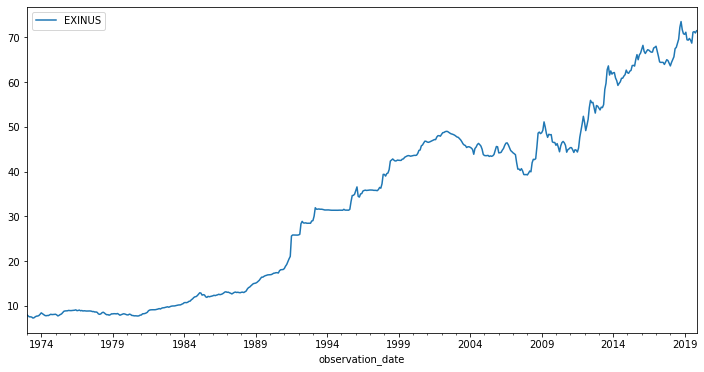

In [8]:
df.plot()
plt.show()

## Detecting Trend using Hodrick-Prescott Filter

In [2]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [9]:
cycle, trend = hpfilter(df.EXINUS, lamb=129600)

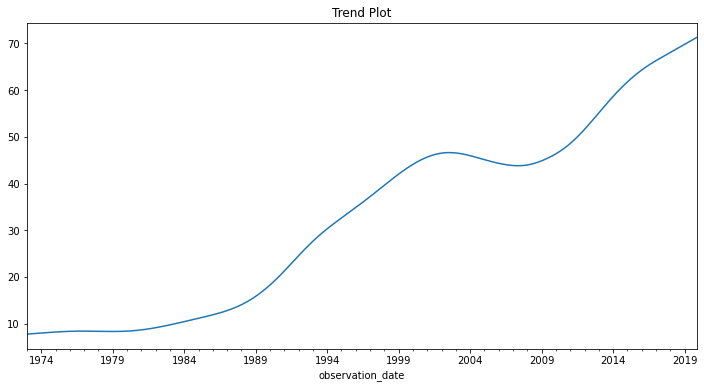

In [13]:
trend.plot()
plt.title('Trend Plot')
plt.show()

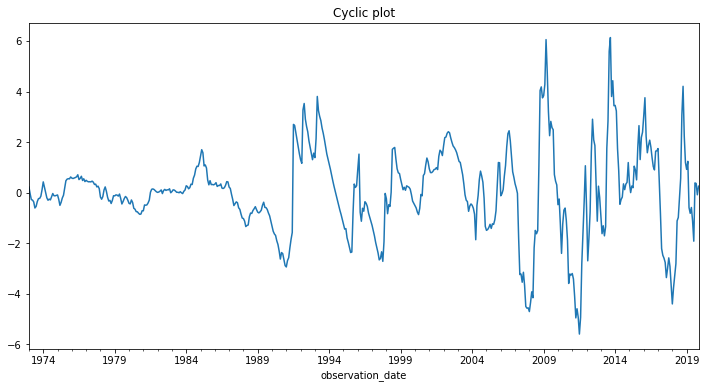

In [12]:
cycle.plot()
plt.title('Cyclic plot')
plt.show()

## Detrending Time Series

    1. Pandas Differencing
    2. SciPy Signal
    3. Hp filter

# Seasonality

## Seasonal Decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df.EXINUS, model='multiplicative', extrapolate_trend='freq')

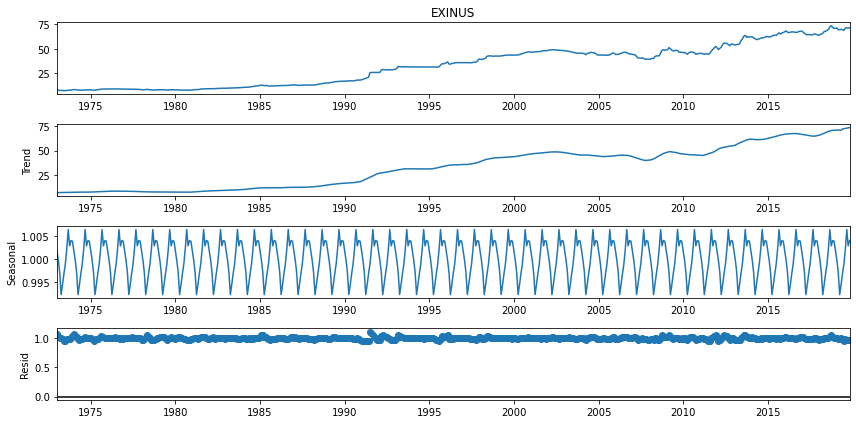

In [18]:
result.plot();

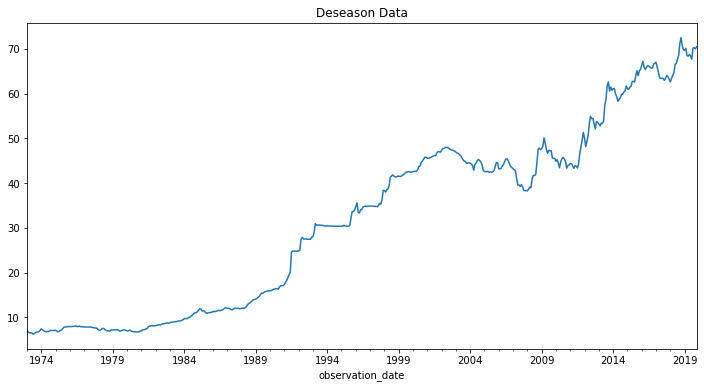

In [22]:
deseason = df.EXINUS - result.seasonal

deseason.plot()

plt.title("Deseason Data")
plt.show()

# Smoothing Methods

## Simple Exponential Smoothing

In [23]:
facebook = pd.read_csv('https://raw.githubusercontent.com/Apress/hands-on-time-series-analylsis-python/master/Data/FB.csv',
                      parse_dates=True, index_col=0)
facebook.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [24]:
X = facebook['Close']

train = X.iloc[:-30]
test = X.iloc[-30:]

In [26]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [34]:
ses = SimpleExpSmoothing(X).fit(smoothing_level=0.9)

In [35]:
ses.summary()

Dep. Variable:,Close,No. Observations:,1259
Model:,SimpleExpSmoothing,SSE,9118.643
Optimized:,True,AIC,2496.824
Trend:,None,BIC,2507.100
Seasonal:,None,AICC,2496.856
Seasonal Periods:,None,Date:,"Thu, 02 Sep 2021"
Box-Cox:,False,Time:,15:48:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
initial_level,76.546946,l.0,True


In [36]:
preds = ses.forecast(30)

rmse = np.sqrt(mean_squared_error(test, preds))

print('RMSE:', rmse)

RMSE: 7.040076374601868


## Double Exponential Smoothing

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt

In [44]:
model1 = Holt(train, damped_trend=False).fit(smoothing_level=0.9, smoothing_trend=0.6, 
                                            damping_trend=0.1, optimized=False)

model1.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,Holt,SSE,12220.966
Optimized:,False,AIC,2830.954
Trend:,Additive,BIC,2851.410
Seasonal:,None,AICC,2831.023
Seasonal Periods:,None,Date:,"Thu, 02 Sep 2021"
Box-Cox:,False,Time:,16:06:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [45]:
preds = model1.forecast(30)

rmse = np.sqrt(mean_squared_error(test, preds))

print('RMSE:', rmse)

RMSE: 2.1764858018573694


In [46]:
model_auto = Holt(train).fit(optimized=True, use_brute=True)
model_auto.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,Holt,SSE,8955.547
Optimized:,True,AIC,2448.883
Trend:,Additive,BIC,2469.339
Seasonal:,None,AICC,2448.952
Seasonal Periods:,None,Date:,"Thu, 02 Sep 2021"
Box-Cox:,False,Time:,16:07:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9796487,alpha,True
smoothing_trend,1.1385e-16,beta,True


In [47]:
preds = model_auto.forecast(30)

rmse = np.sqrt(mean_squared_error(test, preds))

print('RMSE:', rmse)

RMSE: 8.33711470024732


## Triple Exponential Smoothing

In [50]:
model2 = ExponentialSmoothing(train, trend='mul',
                             damped_trend=False, 
                              seasonal_periods=3).fit(smoothing_level=0.9, 
                                                      smoothing_trend=0.6,
                                                      damping_trend=0.6,
                                                      use_boxcox=False,
                                                      use_basinhopping=True,
                                                      optimized=False)

In [51]:
model2.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,ExponentialSmoothing,SSE,12070.220
Optimized:,False,AIC,2815.700
Trend:,Multiplicative,BIC,2836.156
Seasonal:,None,AICC,2815.769
Seasonal Periods:,None,Date:,"Thu, 02 Sep 2021"
Box-Cox:,False,Time:,16:17:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


# Regression Extension Techniques for Time Series Data

In [56]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [57]:
adfuller(facebook['Close'])

(-1.3380957534201885,
 0.6115683442065492,
 0,
 1258,
 {'1%': -3.4355588184378574,
  '5%': -2.8638402312881497,
  '10%': -2.5679946684494275},
 5962.215889308587)

- Fail to reject the null hypothesis. It means data is non-stationary